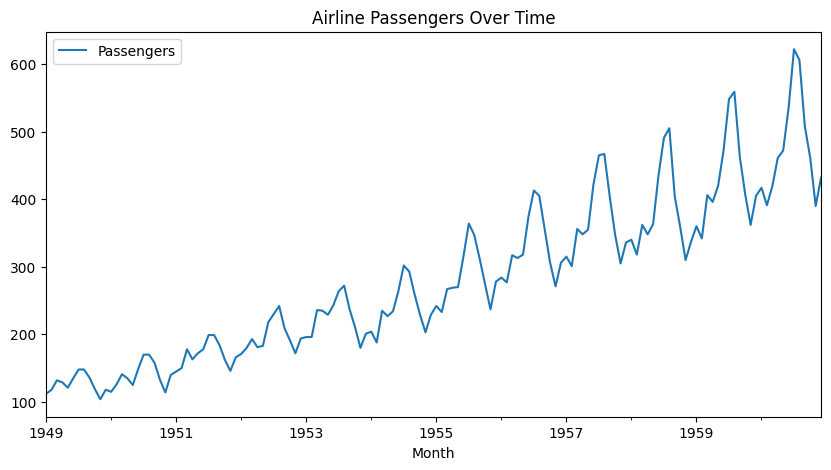

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

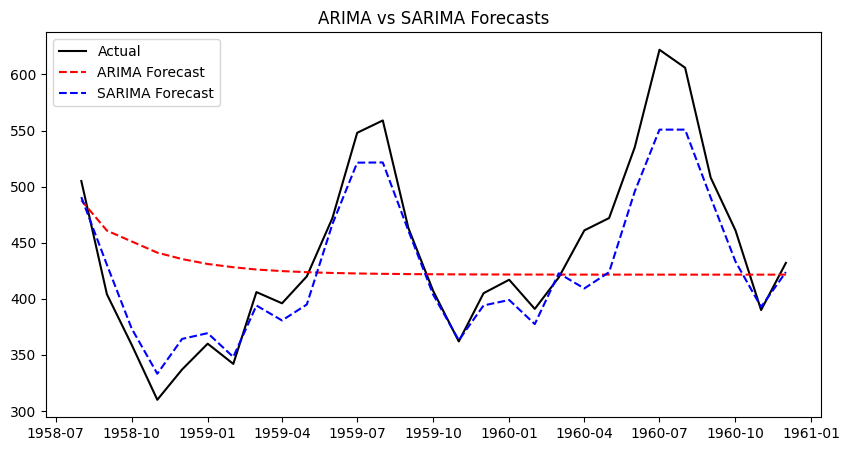

ARIMA RMSE: 82.51
SARIMA RMSE: 27.64
SARIMA performed better because it captured seasonality.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(data_url, index_col='Month', parse_dates=True)
df.columns = ['Passengers']

# Visualize the dataset
df.plot(figsize=(10,5), title="Airline Passengers Over Time")
plt.show()

# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 1️⃣ ARIMA Model
arima_model = ARIMA(train, order=(2,1,2))  # p=2, d=1, q=2
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

# 2️⃣ SARIMA Model
sarima_model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12))  # Seasonality
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Compare Forecasts
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label="Actual", color='black')
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", linestyle='dashed', color='red')
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast", linestyle='dashed', color='blue')
plt.title("ARIMA vs SARIMA Forecasts")
plt.legend()
plt.show()

# Performance Metrics
arima_rmse = sqrt(mean_squared_error(test, arima_forecast))
sarima_rmse = sqrt(mean_squared_error(test, sarima_forecast))

print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"SARIMA RMSE: {sarima_rmse:.2f}")

# Conclusion
if sarima_rmse < arima_rmse:
    print("SARIMA performed better because it captured seasonality.")
else:
    print("ARIMA performed better, but usually SARIMA is better for seasonal data.")
